# **Análisis Exploratorio de Datos (EDA)**

### **Carga y Configuración**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos más bonitos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Cargar los datos (Asegúrate de que los archivos estén en la misma carpeta)
try:
    df_senescyt = pd.read_csv('../data/matricula_senescyt_2015_2023.csv')
    df_ofertas = pd.read_csv('../data/encuentra_empleo_ofertas_2.csv')
    df_inec = pd.read_csv('../data/inec_enemdu_salarios.csv')
    print("¡Datos cargados correctamente!")
except FileNotFoundError as e:
    print(f"Error: No se encuentra el archivo. {e}")

¡Datos cargados correctamente!


### **A. Análisis de Oferta Académica (SENESCYT)**

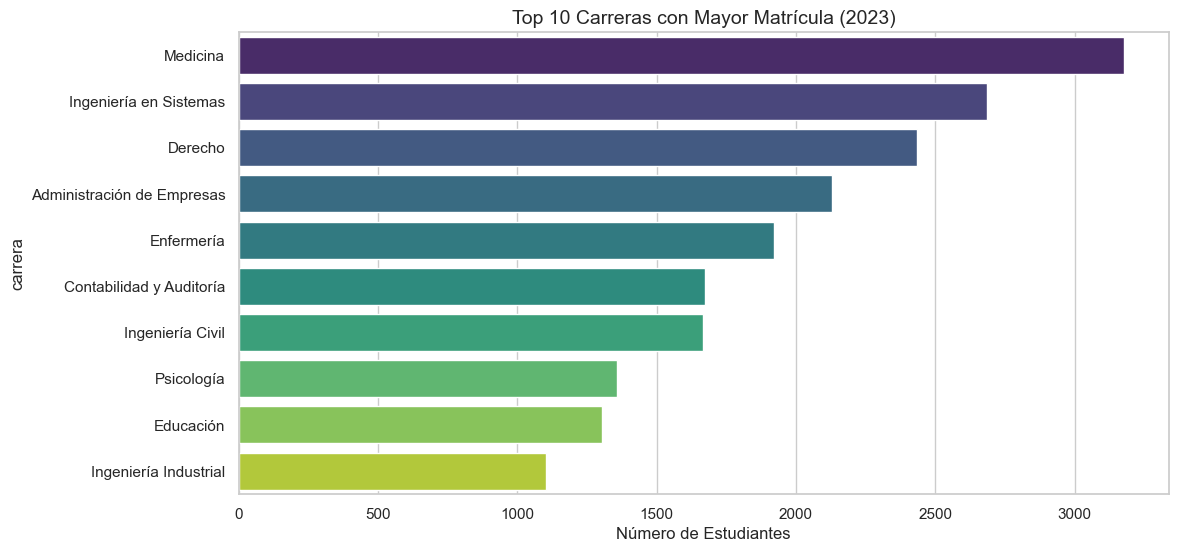

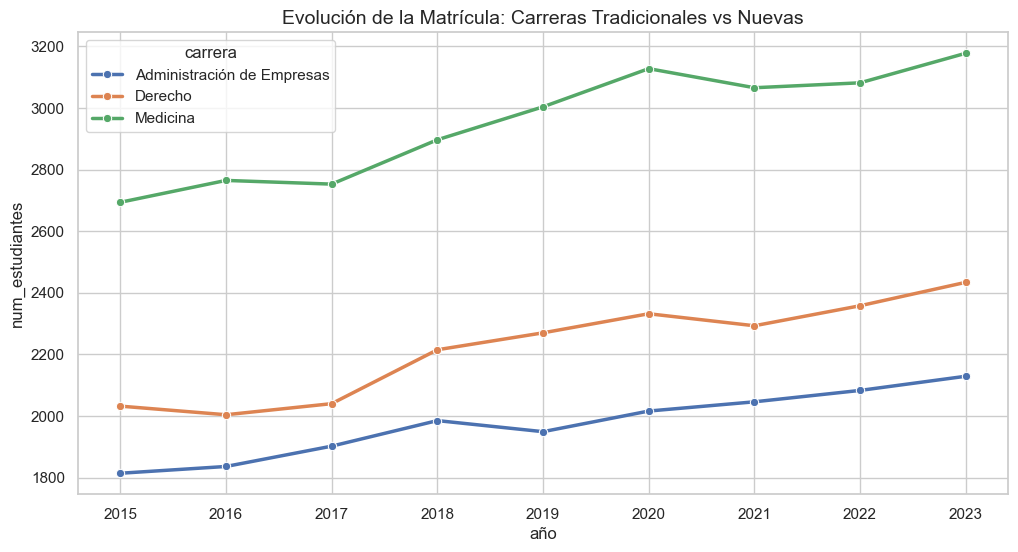

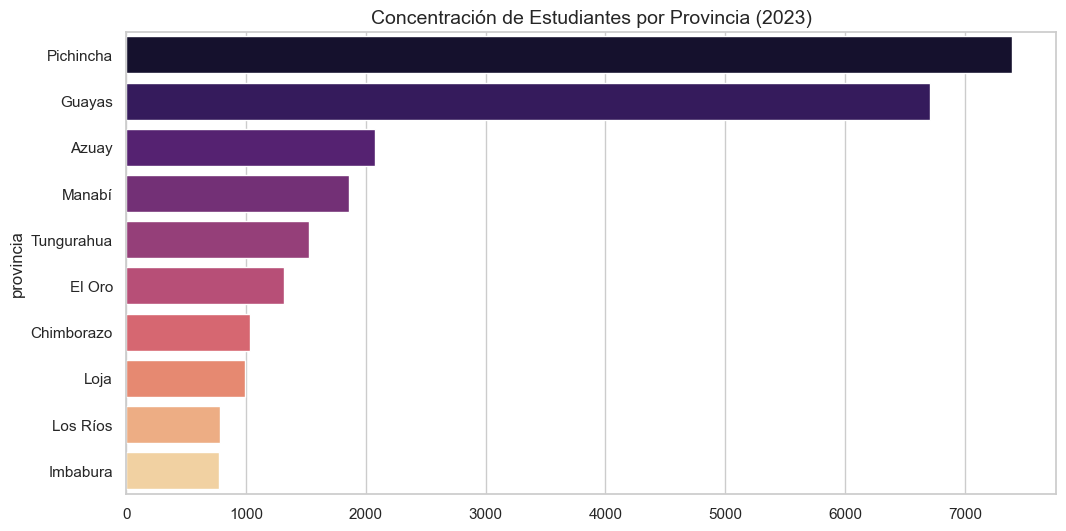

In [2]:
# --- 1. Top 10 Carreras con más matriculados (Solo 2023) ---
df_2023 = df_senescyt[df_senescyt['año'] == 2023]
top_carreras = df_2023.groupby('carrera')['num_estudiantes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_carreras.values, y=top_carreras.index, palette="viridis", hue=top_carreras.index, legend=False)
plt.title('Top 10 Carreras con Mayor Matrícula (2023)', fontsize=14)
plt.xlabel('Número de Estudiantes')
plt.show()

# --- 2. Tendencia Temporal (Ejemplo: Software vs Derecho) ---
# Filtramos algunas carreras clave para comparar
carreras_interes = ['Derecho', 'Desarrollo de Software', 'Medicina', 'Administración de Empresas']
df_trend = df_senescyt[df_senescyt['carrera'].isin(carreras_interes)]
# Agrupamos por año y carrera
trend_data = df_trend.groupby(['año', 'carrera'])['num_estudiantes'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='año', y='num_estudiantes', hue='carrera', marker='o', linewidth=2.5)
plt.title('Evolución de la Matrícula: Carreras Tradicionales vs Nuevas', fontsize=14)
plt.show()

# --- 3. Distribución Geográfica (Top 10 Provincias) ---
top_provincias = df_2023.groupby('provincia')['num_estudiantes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_provincias.values, y=top_provincias.index, palette="magma", hue=top_provincias.index, legend=False)
plt.title('Concentración de Estudiantes por Provincia (2023)', fontsize=14)
plt.show()

### **B. Análisis de Demanda Laboral (Encuentra Empleo)**

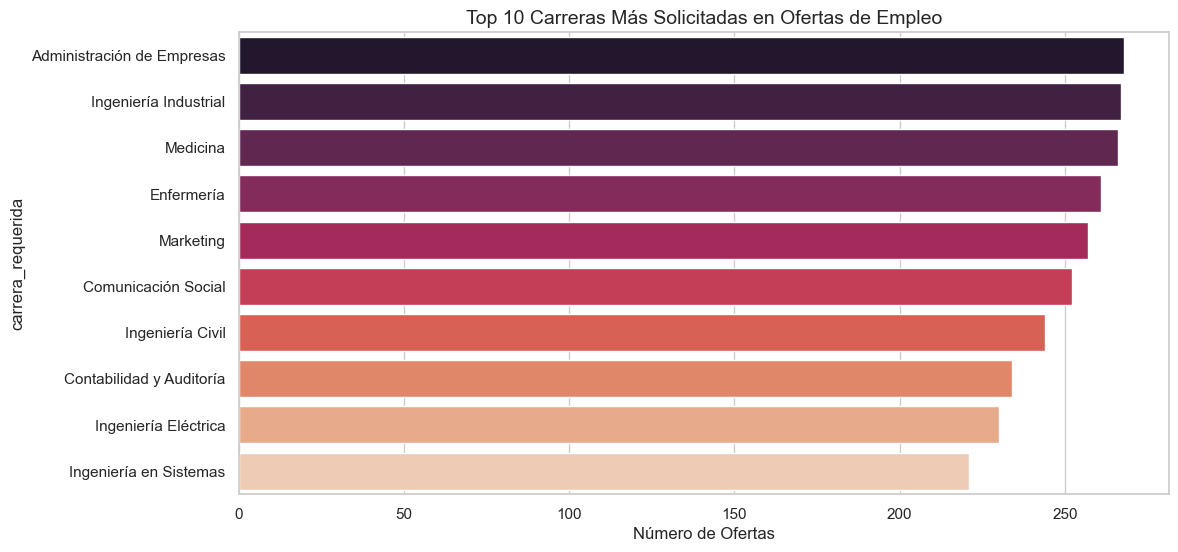

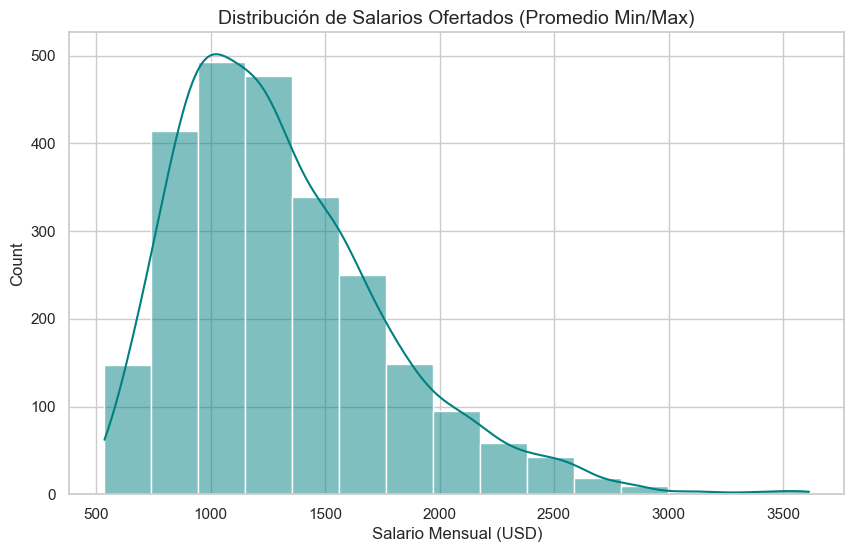

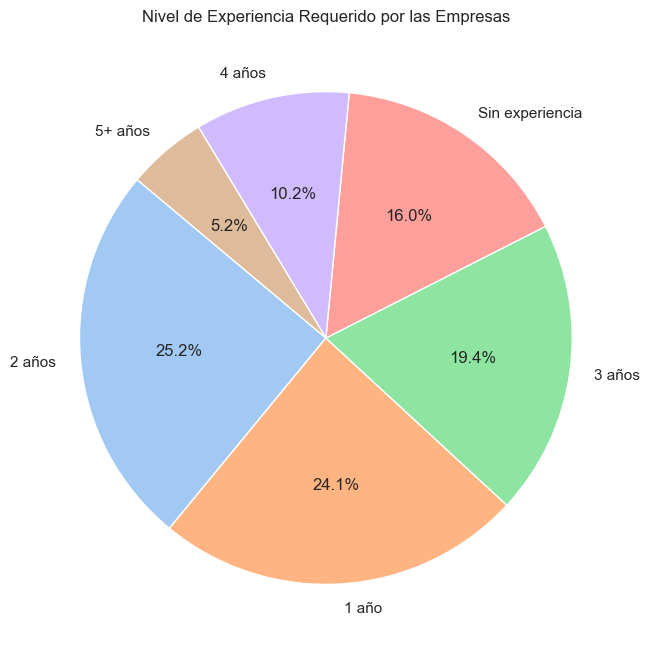

In [3]:
# --- 1. Carreras más buscadas (Top 10) ---
top_demandadas = df_ofertas['carrera_requerida'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_demandadas.values, y=top_demandadas.index, palette="rocket", hue=top_demandadas.index, legend=False)
plt.title('Top 10 Carreras Más Solicitadas en Ofertas de Empleo', fontsize=14)
plt.xlabel('Número de Ofertas')
plt.show()

# --- 2. Histograma de Salarios Ofertados ---
# Calculamos el salario promedio de la oferta
df_ofertas['salario_promedio_oferta'] = (df_ofertas['salario_minimo'] + df_ofertas['salario_maximo']) / 2

plt.figure(figsize=(10, 6))
sns.histplot(df_ofertas['salario_promedio_oferta'], bins=15, kde=True, color='teal')
plt.title('Distribución de Salarios Ofertados (Promedio Min/Max)', fontsize=14)
plt.xlabel('Salario Mensual (USD)')
plt.show()

# --- 3. Experiencia Requerida (Gráfico de Pastel) ---
exp_counts = df_ofertas['experiencia_requerida'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(exp_counts, labels=exp_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Nivel de Experiencia Requerido por las Empresas')
plt.show()

### **C. Análisis de Salarios Reales (INEC)**

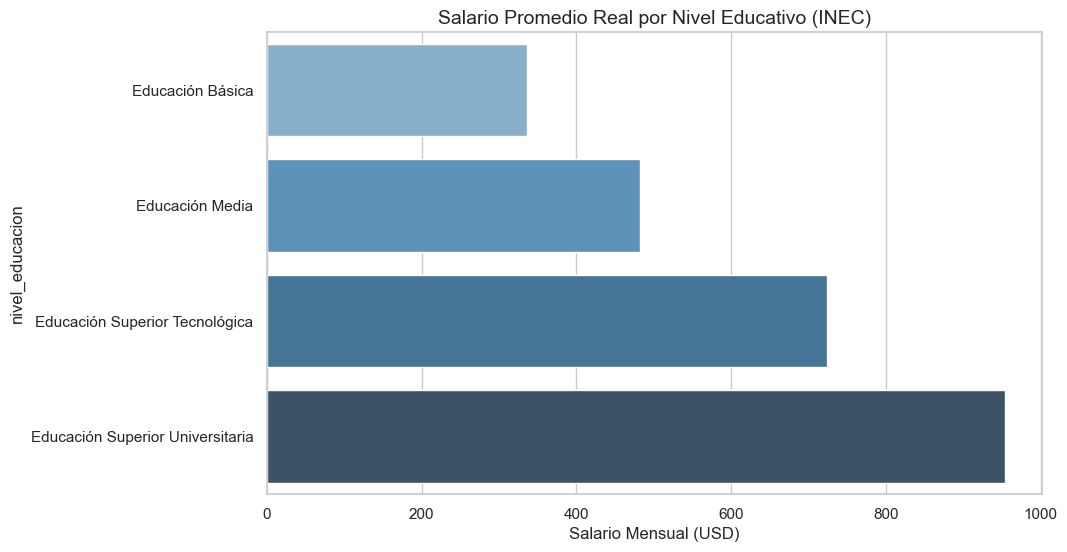

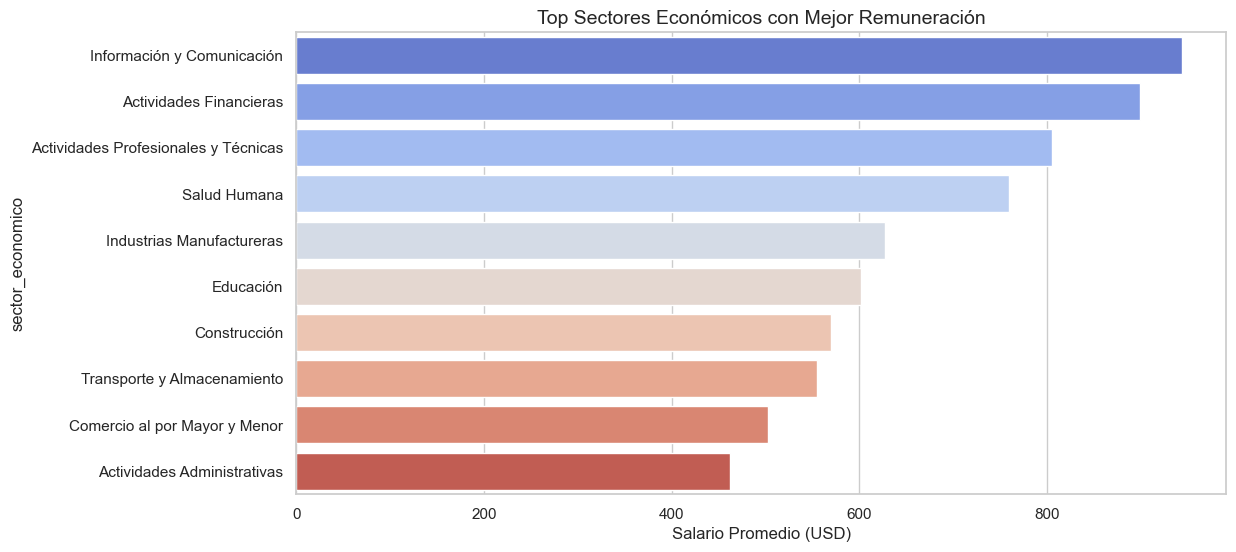

In [4]:
# --- 1. Salario por Nivel Educativo ---
# Agrupamos por nivel educativo y sacamos el promedio del salario reportado
salario_educacion = df_inec.groupby('nivel_educacion')['salario_promedio_mensual'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=salario_educacion.values, y=salario_educacion.index, palette="Blues_d", hue=salario_educacion.index, legend=False)
plt.title('Salario Promedio Real por Nivel Educativo (INEC)', fontsize=14)
plt.xlabel('Salario Mensual (USD)')
plt.show()

# --- 2. Brechas Salariales por Sector Económico ---
# Tomamos el último trimestre disponible (ej. 2023-Q4 si existe, o el promedio general)
salario_sector = df_inec.groupby('sector_economico')['salario_promedio_mensual'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=salario_sector.values, y=salario_sector.index, palette="coolwarm", hue=salario_sector.index, legend=False)
plt.title('Top Sectores Económicos con Mejor Remuneración', fontsize=14)
plt.xlabel('Salario Promedio (USD)')
plt.show()

### **D. El "Cruce" (Oferta vs. Demanda) - El gráfico más importante**

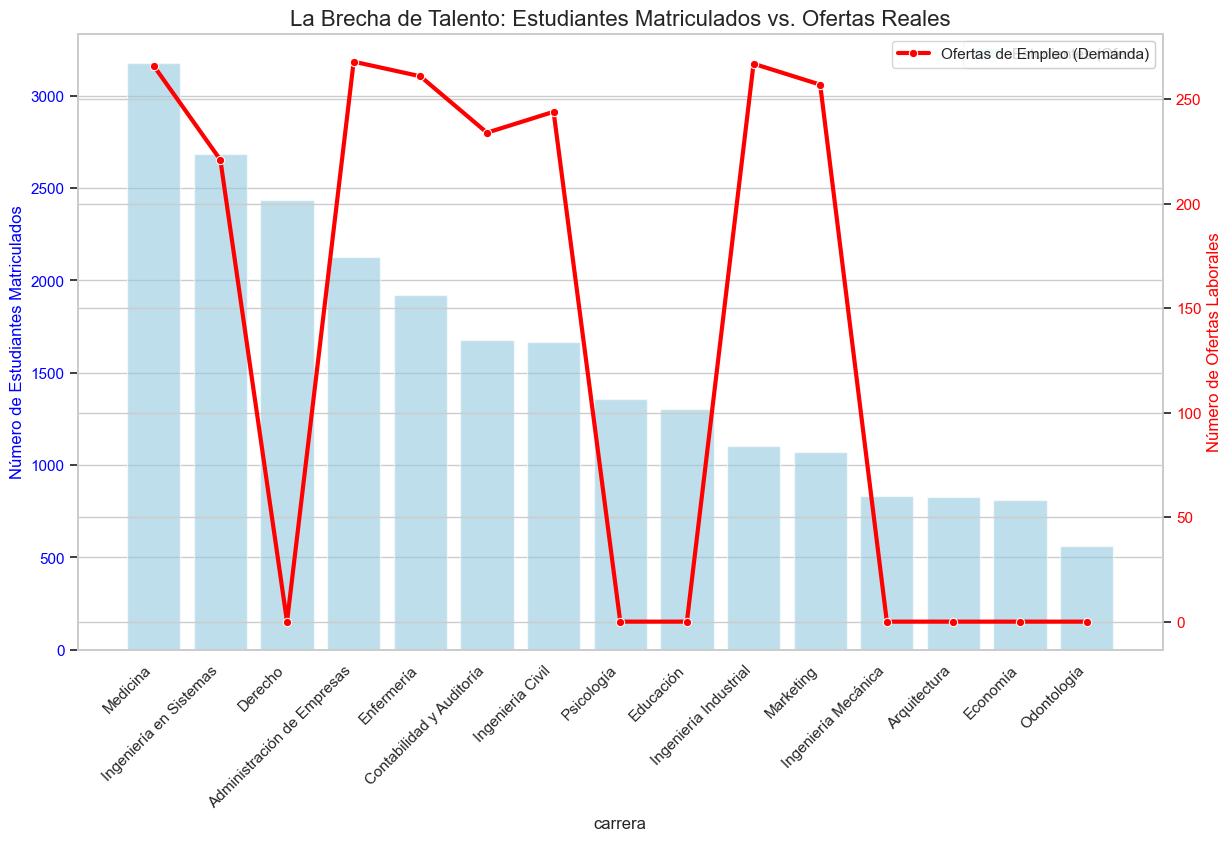

In [5]:
# 1. Preparar datos de Oferta Académica (Estudiantes)
# Agrupamos por carrera y sumamos estudiantes del último año (2023)
oferta_academica = df_senescyt[df_senescyt['año'] == 2023].groupby('carrera')['num_estudiantes'].sum().reset_index()
oferta_academica.rename(columns={'num_estudiantes': 'Total_Estudiantes'}, inplace=True)

# 2. Preparar datos de Demanda Laboral (Vacantes)
demanda_laboral = df_ofertas['carrera_requerida'].value_counts().reset_index()
demanda_laboral.columns = ['carrera', 'Total_Ofertas']

# 3. Unir ambos dataframes (Merge)
# Usamos 'inner' para ver solo las carreras que existen en ambos lados, o 'outer' para todo.
# Para este gráfico, filtraremos las Top 15 carreras con más estudiantes para ver si tienen trabajo.
top_estudiantes = oferta_academica.sort_values('Total_Estudiantes', ascending=False).head(15)
df_cruce = pd.merge(top_estudiantes, demanda_laboral, on='carrera', how='left')

# Llenamos NaN con 0 (si no hay ofertas para esa carrera)
df_cruce['Total_Ofertas'] = df_cruce['Total_Ofertas'].fillna(0)

# 4. Crear el Gráfico Dual
# Necesitamos normalizar o usar eje doble porque la escala de estudiantes es miles y ofertas son decenas/cientos.
# Usaremos ejes dobles para visualizar la brecha.

fig, ax1 = plt.subplots(figsize=(14, 8))

# Barras de Estudiantes (Eje Izquierdo)
sns.barplot(data=df_cruce, x='carrera', y='Total_Estudiantes', color='skyblue', alpha=0.6, ax=ax1, label='Estudiantes (Oferta)')
ax1.set_ylabel('Número de Estudiantes Matriculados', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha='right')

# Línea de Ofertas (Eje Derecho)
ax2 = ax1.twinx()
sns.lineplot(data=df_cruce, x='carrera', y='Total_Ofertas', color='red', marker='o', linewidth=3, ax=ax2, label='Ofertas de Empleo (Demanda)')
ax2.set_ylabel('Número de Ofertas Laborales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('La Brecha de Talento: Estudiantes Matriculados vs. Ofertas Reales', fontsize=16)
plt.show()